# (a) question text part

In [2]:
from question_preprocess import QuestionPreprocessor

In [3]:
import collections
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys

In [4]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [5]:
Qproc = QuestionPreprocessor() 

## load dataset, tokenize them and build vocabulary

In [4]:
test_df, test_data, _ = Qproc.load_data_csv(file_name="test.csv")

In [5]:
train_df, train_data, train_label = Qproc.load_data_csv(file_name="train.csv")

 In training data:
 num of Label 0: 1225312 
 num of Label 1: 80810 
 Toxic percentage: 6.187017751787352 %


In [21]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
# train_df.style.set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])
# pd.option_context('display.colheader_justify','right')
# train_df.head(1100)

In [7]:
train_token = Qproc.tokenizer(train_data)

 Time for tokenizing all questions is 161.61162495613098 (s)


In [8]:
test_token = Qproc.tokenizer(test_data)

 Time for tokenizing all questions is 45.57303786277771 (s)


In [9]:
p = 10
unit = {0: "B", 10: "KB", 20: "MB", 30: "GB"}
print("size is %.5f %s" % (sys.getsizeof(test_data)/2**p, unit[p]))

size is 3303.08594 KB


In [10]:
vocab, words = Qproc.build_vocabulary(test_token+train_token, freq_cutoff=5)

 built vocabulary with 58271 words


In [28]:
vocab = Qproc.load_data_pkl(file_name="vocab.pkl")

In [1]:
# print(vocab)

## save processed data

In [11]:
Qproc.dump_data_pkl(vocab,file_name="vocab.pkl")

 file vocab.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/vocab.pkl


In [12]:
Qproc.dump_data_pkl(test_token, file_name="test_token.pkl")

 file test_token.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/test_token.pkl


In [13]:
Qproc.dump_data_pkl(train_token, file_name="train_token.pkl")

 file train_token.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/train_token.pkl


In [14]:
Qproc.dump_data_pkl(train_label, file_name="train_label.pkl")

 file train_label.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/train_label.pkl


## analyze ditribution of sequence length (unit in word) in the datasets

In [6]:
train_token = Qproc.load_data_pkl(file_name="train_token.pkl")
test_token = Qproc.load_data_pkl(file_name="test_token.pkl")

In [7]:
seq_len_dist = Qproc.seq_len_dist(train_token+test_token)

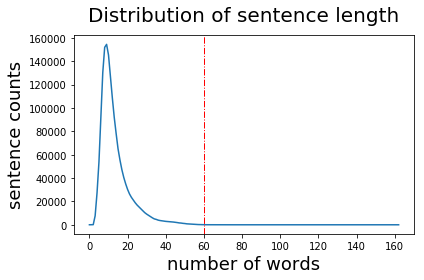

In [10]:
plt.plot(seq_len_dist)
plt.axvline(x=60, color='r', linewidth=1, linestyle='-.')
plt.title('Distribution of sentence length', fontsize=20, y = 1.04)
plt.xlabel('number of words', fontsize=18)
plt.ylabel('sentence counts', fontsize=18)
plt.savefig('/Users/xyli1905/Desktop/sentencelendist.eps', format='eps', dpi=1000)
plt.show()

## one can also load from existing pkl files as shown below

In [7]:
train_token = Qproc.load_data_pkl(file_name="train_token.pkl")
train_label = Qproc.load_data_pkl(file_name="train_label.pkl")
test_token = Qproc.load_data_pkl(file_name="test_token.pkl")
vocab = Qproc.load_data_pkl(file_name="vocab.pkl")

## build & save train and test matrix for NN models (input of embedding layer)

In [17]:
train_mat = Qproc.build_data_mat(vocab, train_token, train_label)

In [18]:
test_mat = Qproc.build_data_mat(vocab, test_token)

In [24]:
train_mat[123034]
test_mat[122112]

array([56702, 26450, 52014, 41046, 19553, 53054, 33934, 17852, 41604,
       41435, 20183, 40398,   791, 30681, 57120,  2643,  4767, 36644,
        4887, 52562, 45747,   371, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272])

In [22]:
train_mat = Qproc.load_data_pkl(file_name="train_mat.pkl")

In [27]:
train_mat[1078][:-1]

array([56702, 26450, 52014, 17989, 19646, 36644, 28828,   371, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272, 58272,
       58272, 58272, 58272, 58272, 58272, 58272])

In [25]:
Qproc.dump_data_pkl(train_mat, file_name="train_mat.pkl")
Qproc.dump_data_pkl(test_mat, file_name="test_mat.pkl")

 file train_mat.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/train_mat.pkl
 file test_mat.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/test_mat.pkl


# (b) embedding part

In [26]:
import torch
from embedding_preprocess import EmbeddingPreprocessor

In [27]:
Eproc = EmbeddingPreprocessor()

## load vocabulary and embedding

In [28]:
vocab = Eproc.load_vocabulary_pkl(file_name="vocab.pkl")

In [29]:
glove = Eproc.load_embedding(file_name="glove.840B.300d.txt")

## build pretrained_weight matrix for embedding layer

In [30]:
pretrained_weight = Eproc.get_pretrained_weight(vocab, glove)

In [31]:
print(len(vocab), len(glove), pretrained_weight.shape)

58271 2195895 (58273, 300)


## save pretrained_weight and release memory (glove ~ 5G)

In [32]:
Eproc.dump_weight_mat_pkl(pretrained_weight,file_name="glove.pkl")

 file glove.pkl saved to /Users/xyli1905/Projects/NLP/detoxic/data_proc/processed_data/glove.pkl


In [33]:
Eproc.release_emb_mem(glove)


clear embedding memory
